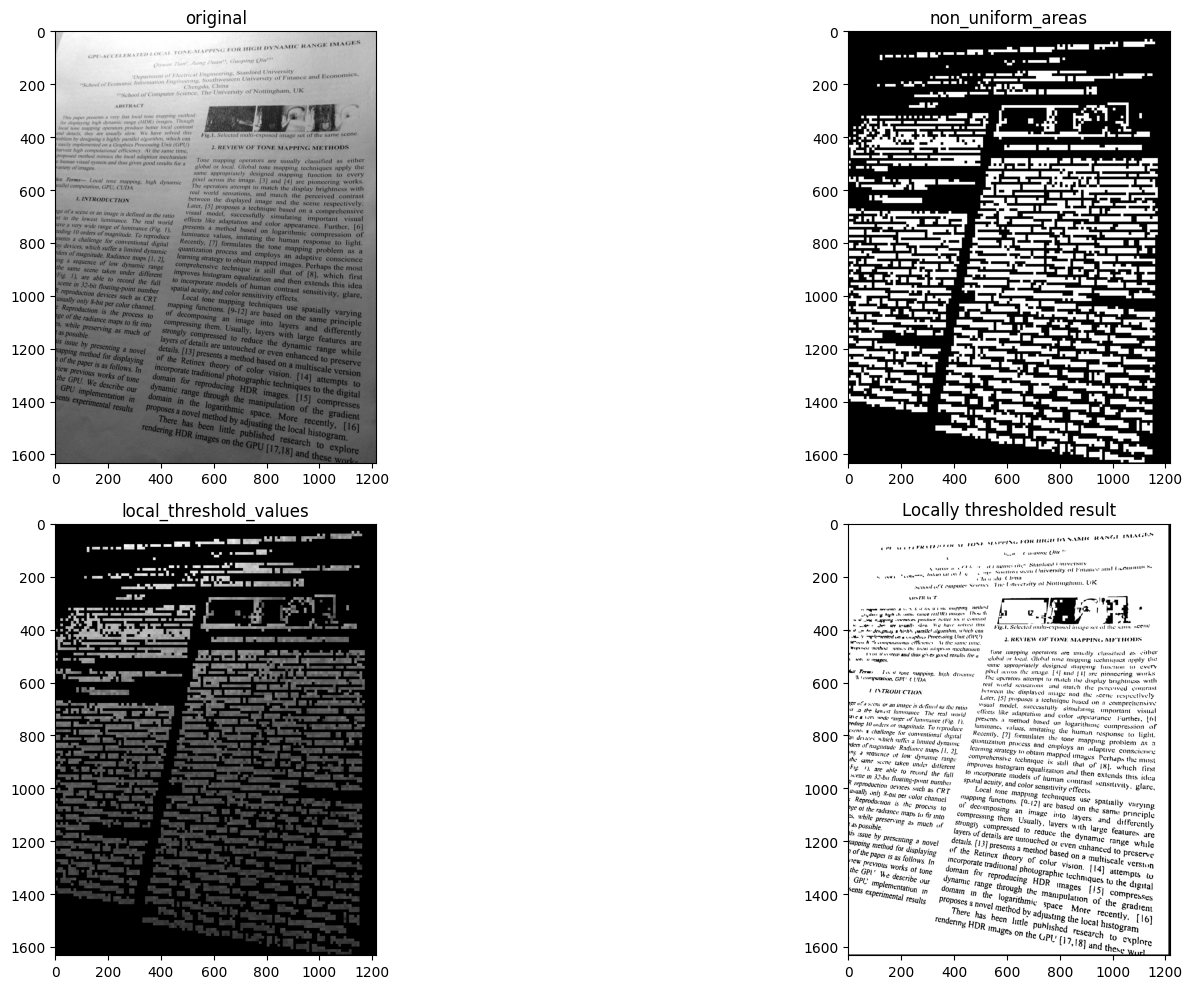

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def locally_threshold(img, window_size=(30, 30), variance_thres=500, uniform_thres=128):
    h, w = img.shape[0], img.shape[1]
    rows, cols = h//window_size[0], w//window_size[1]

    bin_img = np.zeros_like(img, np.uint8)
    non_uniform_areas = np.zeros_like(img, np.uint8)
    local_threshold_values = np.zeros_like(img, np.uint8)

    # slide window block by block
    for i in range(rows):
        for j in range(cols):
            y0, x0 = i*window_size[0], j*window_size[1]
            y1, x1 = y0 + window_size[0], x0 + window_size[1]
            window = img[y0:y1, x0:x1]

            var = np.var(window)

            # uniform
            if var < variance_thres:
                if np.mean(window) > uniform_thres:
                    bin_img[y0:y1, x0:x1] = 1
                else :
                    bin_img[y0:y1, x0:x1] = 0
            # non-uniform
            else:
                t_, bin_ = cv2.threshold(window, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
                bin_img[y0:y1, x0:x1] = bin_
                non_uniform_areas[y0:y1, x0:x1] = 1
                local_threshold_values[y0:y1, x0:x1] = t_

    return bin_img, non_uniform_areas, local_threshold_values


img = cv2.imread("paper.png", cv2.IMREAD_GRAYSCALE)

bin_img, non_uniform_areas, local_threshold_values = locally_threshold(img, window_size=(10, 10), uniform_thres=50)

plt.figure("lab3", (20, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("original")

plt.subplot(2, 2, 2)
plt.imshow(non_uniform_areas, cmap='gray')
plt.title("non_uniform_areas")

plt.subplot(2, 2, 2)
plt.imshow(non_uniform_areas, cmap='gray')
plt.title("non_uniform_areas")


plt.subplot(2, 2, 3)
plt.imshow(local_threshold_values, cmap='gray')
plt.title("local_threshold_values")

plt.subplot(2, 2, 4)
plt.imshow(bin_img, cmap='gray')
plt.title("Locally thresholded result")

plt.tight_layout()


